Notebook used to test algorithms created in training algorthms 2

# Cleaning data for test

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('./diamonds-datamad0321/test.csv')

In [3]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
diamonds_color = onehotencoder.fit_transform(diamonds['color'].values.reshape(-1,1)).toarray()

labels = [str(a) for a in list(diamonds.color.unique())]

diamonds[labels] = pd.DataFrame(diamonds_color,index = diamonds.index)

In [4]:
diamonds_cut = onehotencoder.fit_transform(diamonds['cut'].values.reshape(-1,1)).toarray()

labels = [str(a) for a in list(diamonds.cut.unique())]

diamonds[labels] = pd.DataFrame(diamonds_cut,index = diamonds.index)

diamonds

,id,carat,cut,color,clarity,depth,table,x,y,z,...,F,E,G,I,J,Ideal,Good,Premium,Very Good,Fair
0,0,2.01,Ideal,H,SI1,61.9,57.0,8.14,8.05,5.01,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.49,Good,D,VS1,57.5,60.0,5.18,5.25,3.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1.03,Premium,F,SI1,58.6,62.0,6.65,6.60,3.88,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0.90,Very Good,E,SI1,63.0,56.0,6.11,6.15,3.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0.59,Ideal,D,SI1,62.5,55.0,5.35,5.40,3.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.41,Good,F,I1,63.8,57.0,4.72,4.69,3.00,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13481,13481,2.05,Very Good,H,VS2,63.5,62.0,8.05,7.91,5.07,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13482,13482,2.22,Premium,I,VS2,60.5,59.0,8.41,8.37,5.08,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13483,13483,0.51,Ideal,E,SI2,58.3,62.0,5.20,5.19,3.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
onehotencoder = OneHotEncoder()
diamonds_clarity = onehotencoder.fit_transform(diamonds['clarity'].values.reshape(-1,1)).toarray()
labels = [str(a) for a in list(diamonds.clarity.unique())]
diamonds[labels] = pd.DataFrame(diamonds_clarity,index = diamonds.index)
diamonds = diamonds.drop('clarity', axis = 1)

In [156]:
diamonds.columns

Index(['id', 'carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z', 'H',
       'D', 'F', 'E', 'G', 'I', 'J', 'Ideal', 'Good', 'Premium', 'Very Good',
       'Fair', 'SI1', 'VS1', 'VS2', 'SI2', 'VVS1', 'IF', 'VVS2', 'I1'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
diamonds['depth'] = scaler.fit_transform(diamonds["depth"].values.reshape(-1,1))

In [38]:
scaler = StandardScaler()

diamonds['table'] = scaler.fit_transform(diamonds["table"].values.reshape(-1,1))

diamonds.table

0       -0.204957
1        1.127292
2        2.015458
3       -0.649040
4       -1.093122
           ...   
13480   -0.204957
13481    2.015458
13482    0.683209
13483    2.015458
13484    0.683209
Name: table, Length: 13485, dtype: float64

# Applying Models

In [8]:
diamonds_no = diamonds.drop('id', axis =1)

In [15]:
diamonds_no = diamonds.drop('price', axis =1)

KeyError: "['price'] not found in axis"

In [8]:
import pickle

In [ ]:
random_forest2 = pickle.load(open("random_forest", 'rb'))

In [ ]:
diamonds['price'] = random_forest_1.predict(diamonds)

In [ ]:
pricepred.to_csv('price_pred_rf.csv', index = False)

# XGB

In [107]:
diamond_xgb.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'H', 'D', 'F', 'E', 'G', 'I',
       'J', 'Ideal', 'Good', 'Premium', 'Very Good', 'Fair', 'SI1', 'VS1',
       'VS2', 'SI2', 'VVS1', 'IF', 'VVS2', 'I1', 'price'],
      dtype='object')

In [108]:
diamond_xgb.shape

(13485, 27)

In [109]:
diamond_xgb = diamond_xgb.drop('price', axis =1)

# Stacked Model 1

In [151]:
Stacked = pickle.load(open("Stacked_Regressor_Model_1", 'rb'))

In [158]:
diamond_stk.to_csv('diamond_stk.csv')

In [154]:
diamond_stk['price'] = Stacked.predict(diamond_stk)

ValueError: Feature shape mismatch, expected: 5, got 13485

# RF 3

In [74]:
diamonds_rf = diamonds.drop(['cut', 'color', 'id'], axis = 1)

In [76]:
diamonds_rf.shape

(13485, 26)

In [77]:
RF3 = pickle.load(open("random_forest3", 'rb'))

In [78]:
diamonds_rf['price'] = RF3.predict(diamonds_rf)

In [79]:
diamonds_rf

,carat,depth,table,x,y,z,H,D,F,E,...,Fair,SI1,VS1,VS2,SI2,VVS1,IF,VVS2,I1,price
0,2.01,0.099968,-0.204957,8.14,8.05,5.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.709548
1,0.49,-3.000824,1.127292,5.18,5.25,3.00,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.303604
2,1.03,-2.225626,2.015458,6.65,6.60,3.88,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.487201
3,0.90,0.875166,-0.649040,6.11,6.15,3.86,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.347823
4,0.59,0.522803,-1.093122,5.35,5.40,3.36,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.485909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.41,1.438946,-0.204957,4.72,4.69,3.00,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.511875
13481,2.05,1.227529,2.015458,8.05,7.91,5.07,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.591842
13482,2.22,-0.886648,0.683209,8.41,8.37,5.08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.767995
13483,0.51,-2.437043,2.015458,5.20,5.19,3.04,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.071805


# RF 2

In [ ]:
random_forest_2 = pickle.load(open("random_forest2", 'rb'))


In [ ]:
diamonds_no['price'] = random_forest_2.predict(diamonds_no)

In [ ]:
pricepred2 = diamonds_no[ 'price']

In [ ]:
pricepred2.to_csv('price_pred_rf2.csv', index = True)

In [ ]:
pred = pd.read_csv('price_pred_rf2.csv')

In [ ]:
pred['id'] = pred['Unnamed: 0']

In [ ]:
pred = pred[['id', 'price']]

In [ ]:
pred.to_csv('price_pred_rf2.csv', index = False)

# Creating Predictions with average of 2 xgboosts

In [110]:
XGB = pickle.load(open("xgb_6", 'rb'))

In [159]:
XGB2 = pickle.load(open("xgb_7", 'rb'))

In [99]:
diamond_xgb = diamonds.drop(['cut', 'color', 'id'], axis = 1)

In [111]:
diamond_xgb['price'] = XGB.predict(diamond_xgb)

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [112]:
price_pred_xgb = diamond_xgb['price']

In [113]:
price_pred_xgb.to_csv('xgboost1.csv', index = True)

In [114]:
pred = pd.read_csv('xgboost1.csv')
pred

,Unnamed: 0,price
0,0,9.719091
1,1,7.340820
2,2,8.506308
3,3,8.362960
4,4,7.504757
...,...,...
13480,13480,6.306827
13481,13481,9.647510
13482,13482,9.766759
13483,13483,7.059518


In [132]:
pred2 = pd.read_csv('xgboost_5.csv')
pred2

,id,price
0,0,9.668117
1,1,7.346444
2,2,8.492664
3,3,8.359540
4,4,7.481163
...,...,...
13480,13480,6.363604
13481,13481,9.656986
13482,13482,9.758324
13483,13483,7.085171


In [133]:
pred5 = (pred2.price + pred.price) / 2
pred5

0        9.693604
1        7.343632
2        8.499486
3        8.361250
4        7.492960
           ...   
13480    6.335216
13481    9.652248
13482    9.762542
13483    7.072345
13484    7.265910
Name: price, Length: 13485, dtype: float64

In [160]:
pred5.to_csv('xgboost5_6_avg.csv', index = True)
pred5=pd.read_csv('xgboost5_6_avg.csv')
pred5['id'] = pred5['Unnamed: 0']
pred5 = pred5[['id', 'price']]
pred5.to_csv('xgboost5_6_avg.csv', index = False)

In [161]:
pred5

,id,price
0,0,9.693604
1,1,7.343632
2,2,8.499486
3,3,8.361250
4,4,7.492960
...,...,...
13480,13480,6.335216
13481,13481,9.652248
13482,13482,9.762541
13483,13483,7.072345


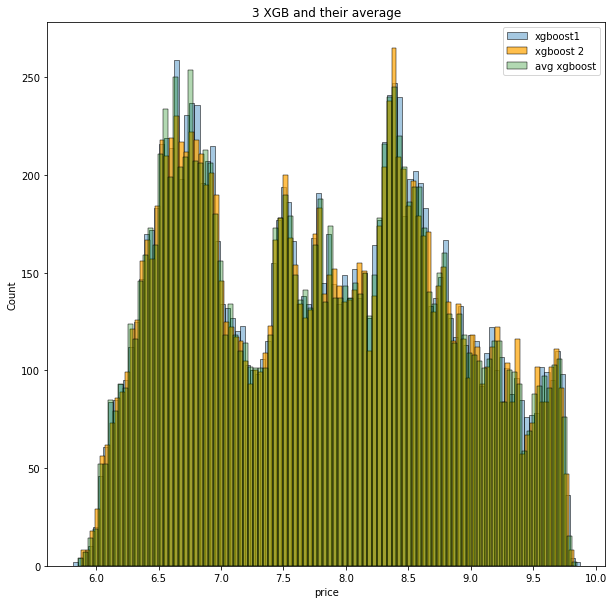

In [165]:
import seaborn as sns
plt.figure(figsize = (10, 10))
sns.histplot(pred.price, bins = 100, alpha = .4, label = 'xgboost1')
sns.histplot(pred2.price, bins = 100, color ='orange', alpha = 0.7, label = 'xgboost 2')
sns.histplot(pred5.price, bins = 100, color ='green', alpha = 0.3, label = 'avg xgboost')
plt.title('3 XGB and their average')
plt.legend()
plt.savefig('3 XGB and their average.png')

In [104]:
pred['id'] = pred['Unnamed: 0']
pred = pred[['id', 'price']]

In [105]:
pred

,id,price
0,0,9.668117
1,1,7.346444
2,2,8.492664
3,3,8.359540
4,4,7.481163
...,...,...
13480,13480,6.363604
13481,13481,9.656986
13482,13482,9.758324
13483,13483,7.085171


In [106]:
pred.to_csv('xgboost_5.csv', index = False)

In [84]:
pred['price2'] = diamonds_rf.price

In [86]:
pred['avg_price'] = pred[['price', 'price2']].mean(axis=1)

In [89]:
pred_avg = pred[['id', 'avg_price']]

In [91]:
pred_avg['price'] = pred_avg['avg_price']

<ipython-input-91-3052ed4599c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_avg['price'] = pred_avg['avg_price']


In [94]:
pred_avg = pred_avg.drop('avg_price', axis = 1)

In [95]:
pred_avg.to_csv('xgboost_rf_avf.csv', index = False)

# Testing AVG of Pipeline Stacked Model and AVG of XGBoost Models

In [ ]:
gb_1 = pickle.load(open("gb_1", 'rb'))

In [ ]:
diamonds2 = diamonds.drop('price', axis=1).copy()

In [ ]:
diamonds2['price'] = gb_1.predict(diamonds2)

In [ ]:
pricepred2 = diamonds2[['id', 'price']]

In [ ]:
pricepred2.to_csv('price_pred_gb_1.csv', index = False)

In [168]:
pred5

,id,price
0,0,9.693604
1,1,7.343632
2,2,8.499486
3,3,8.361250
4,4,7.492960
...,...,...
13480,13480,6.335216
13481,13481,9.652248
13482,13482,9.762541
13483,13483,7.072345


#### we plot our stacked model prediction with our AVG of 2 best XGboost predictions and come to new predictions with both

In [166]:
pipeline = pd.read_csv('stacked_price_pred2.csv')

<AxesSubplot:xlabel='price', ylabel='Count'>

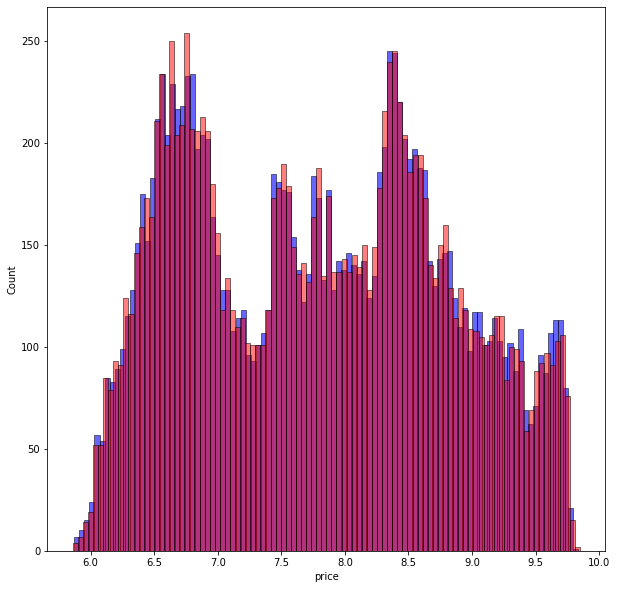

In [199]:
plt.figure(figsize = (10, 10))
sns.histplot(pipeline.price, bins = 100, color ='blue', alpha = 0.6, label = 'stackedmodel')
sns.histplot(pred5.price, bins = 100, color ='red', alpha = 0.5, label = 'avg xgboost')

In [174]:
#We create a new column with our predictions
pipeline['price_avg'] = (pipeline.price + pred5.price)/2

In [176]:
pipeline.price_avg

0        9.653240
1        7.330194
2        8.472193
3        8.334094
4        7.484679
           ...   
13480    6.386930
13481    9.649205
13482    9.742818
13483    7.070327
13484    7.245108
Name: price_avg, Length: 13485, dtype: float64

In [177]:
pipeline['price'] = pipeline['price_avg']


In [183]:
pipeline = pipeline.drop('price_avg', axis =1)

In [184]:
#We save and export the data, this so far has been the best prediction

pipeline.to_csv('pipeline+XGBavg.csv', index = False)

In [188]:
xgb7 = pickle.load(open("xgb_7", 'rb'))

In [189]:
xgb7

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.095, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0949999988, max_delta_step=0, max_depth=13,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=111, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
diamond_test = pd.read_csv('diamond_stk.csv')

In [195]:
diamond_test.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'H', 'D', 'F',
       'E', 'G', 'I', 'J', 'Ideal', 'Good', 'Premium', 'Very Good', 'Fair',
       'SI1', 'VS1', 'VS2', 'SI2', 'VVS1', 'IF', 'VVS2', 'I1'],
      dtype='object')

In [196]:
diamond_test = diamond_test.drop('Unnamed: 0', axis =1)

In [197]:
diamond_test['price'] = xgb7.predict(diamond_test)

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [198]:
diamond_test

,carat,depth,table,x,y,z,H,D,F,E,...,Fair,SI1,VS1,VS2,SI2,VVS1,IF,VVS2,I1,price
0,2.01,0.099968,-0.204957,8.14,8.05,5.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.719636
1,0.49,-3.000824,1.127292,5.18,5.25,3.00,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.340848
2,1.03,-2.225626,2.015458,6.65,6.60,3.88,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.506335
3,0.90,0.875166,-0.649040,6.11,6.15,3.86,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.362988
4,0.59,0.522803,-1.093122,5.35,5.40,3.36,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.504784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.41,1.438946,-0.204957,4.72,4.69,3.00,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.306855
13481,2.05,1.227529,2.015458,8.05,7.91,5.07,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.647719
13482,2.22,-0.886648,0.683209,8.41,8.37,5.08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.769608
13483,0.51,-2.437043,2.015458,5.20,5.19,3.04,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.059546


<AxesSubplot:xlabel='price', ylabel='Count'>

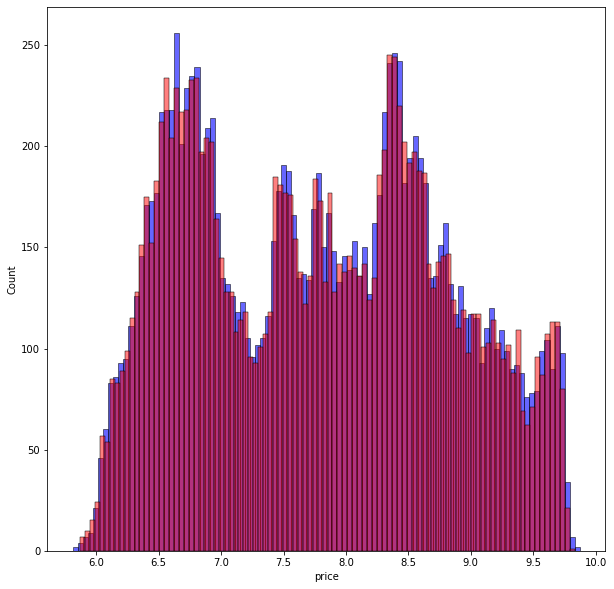

In [200]:
plt.figure(figsize = (10, 10))
sns.histplot(diamond_test.price, bins = 100, color ='blue', alpha = 0.6, label = 'xgboost7')
sns.histplot(pipeline.price, bins = 100, color ='red', alpha = 0.5, label = 'stacked + avg xgboost')

In [209]:
diamond_test['avg'] = (pipeline.price + diamond_test.price)/2

AttributeError: 'DataFrame' object has no attribute 'price'

In [207]:
diamond_test = pd.DataFrame(diamond_test['avg'], index = True )

TypeError: Index(...) must be called with a collection of some kind, True was passed

In [211]:
diamond_test['price'] = diamond_test['avg']

In [212]:
diamond_test['price']

0        9.686438
1        7.335521
2        8.489264
3        8.348541
4        7.494732
           ...   
13480    6.346893
13481    9.648462
13482    9.756213
13483    7.064936
13484    7.263105
Name: price, Length: 13485, dtype: float64

In [213]:
d = diamond_test['price']

In [217]:
dc = pd.DataFrame(d, index = True)

TypeError: Index(...) must be called with a collection of some kind, True was passed

In [222]:
dc['id'] = dc.index

In [225]:
avg_stackedxgb2 = dc[['id', 'price']]

In [226]:
avg_stackedxgb2.to_csv('stacked_avgXGB_XGB7.csv', index = False)